# Laboratorio 1 - Reinforcement Learning
## Grupo 10
## Integrantes:

- Mario Guerra - Carné: 21008
- Diego Hernández - Carné: 21270
- Linda Jiménez - Carné: 21169

In [9]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Task 2

1. Crea una clase Bandit para representar el entorno. Esta clase debería inicializar 10 brazos, cada uno con una probabilidad de recompensa elegida al azar entre 0 y 1.

2. La clase debe tener un método pull(arm) que devuelva una recompensa de 1 con la probabilidad específica del brazo elegido y 0 en caso contrario.

In [2]:
# Clase Bandit
class Bandit:
    def __init__(self, num_arms=10):
        self.num_arms = num_arms
        self.probabilities = np.random.rand(num_arms)  # Probabilidades entre 0 y 1.

    # Método Pull
    def pull(self, arm):
        return 1 if random.random() < self.probabilities[arm] else 0

3. Cree una clase de Agent para implementar la estrategia de épsilon-greedy.

4. Inicialice el agente con un valor épsilon específico para la exploración, una matriz para almacenar las recompensas estimadas para cada brazo (inicializada en cero) y una matriz para contar la cantidad de
veces que se ha extraído cada brazo.

5. Implemente un método select_arm() en la clase Agent que:
   
    a. Con probabilidad épsilon, selecciona un brazo aleatorio.
   
    b. Con probabilidad 1−ε, selecciona el brazo con la recompensa estimada más alta.

6. Implemente un método update_estimates(arm, recompensa) para actualizar la recompensa estimada para el brazo elegido usando la fórmula vista en clase.

In [3]:
# Clase Agent
class Agent:
    def __init__(self, num_arms=10, epsilon=0.1):
        # Elementos de la clase, en los que incluye el valor epsilon, el número de brazos, una matriz para almacenar las recompensas del brazo
        # y una matriz para el conteo de veces que se ha extraído cada brazo.
        self.epsilon = epsilon
        self.num_arms = num_arms
        self.counts = np.zeros(num_arms)
        self.values = np.zeros(num_arms)

    def select_arm(self):
        # Selección de brazo usando la estrategia epsilon-greedy
        if random.random() < self.epsilon:
            return random.randint(0, self.num_arms - 1) # Explorar 
        else:
            return np.argmax(self.values) # Explotar

    def update_estimates(self, arm, reward):
        # Actualización de las estimaciones de recompensa para el brazo elegido
        self.counts[arm] += 1
        n = self.counts[arm]
        value = self.values[arm]
        # Fórmula para actualizar la recompensa estimada
        self.values[arm] = value + (reward - value) / n 

7. Inicialice Bandit y Agent con épsilon configurado en 0.1.

In [4]:
bandit = Bandit()
agent = Agent(epsilon=0.1)

8. Ejecute la simulación para 1,000 iteraciones.
9. En cada prueba, seleccione un brazo usando select_arm(), tire del brazo en el entorno Bandit para obtener
una recompensa y actualice las recompensas estimadas usando update_estimates().
10. Realice un seguimiento e imprima la recompensa acumulada al final de la simulación.

In [ ]:
total_rewards = []
cumulative_rewards = []

reward_sum = 0

# Bucle 1000 iteraciones
for i in range(1000): 
    arm = agent.select_arm()                      # Elegir brazo
    reward = bandit.pull(arm)                     # Obtener recompensa
    agent.update_estimates(arm, reward)           # Update de recompensas estimadas

    total_rewards.append(reward)                  # Array recompensas individuales

    reward_sum += reward
    cumulative_rewards.append(reward_sum)         # Array recompensa acumulada

# Recompensa total
print("Recompensa total después de 1000 iteraciones:", reward_sum)

Recompensa total después de 1000 iteraciones: 902


11. Grafique la recompensa acumulada en las pruebas para visualizar la mejora del desempeño del agente.

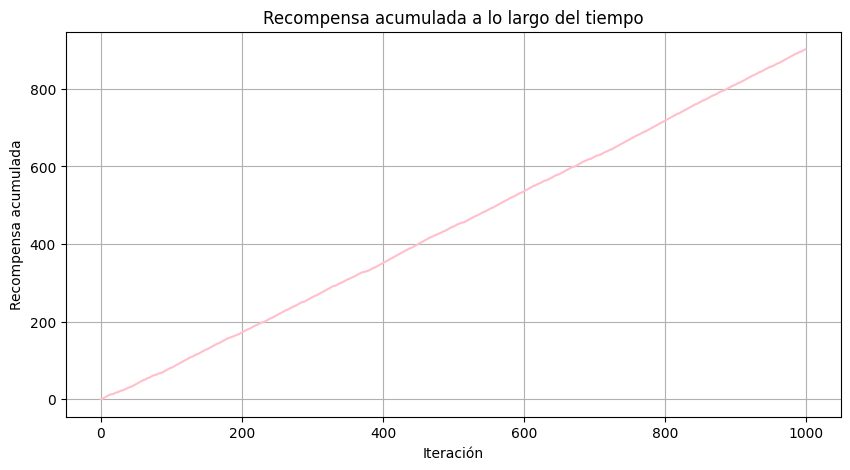

In [38]:
plt.figure(figsize=(10, 5))
plt.plot(cumulative_rewards, color='pink')
plt.title("Recompensa acumulada a lo largo del tiempo")
plt.xlabel("Iteración")
plt.ylabel("Recompensa acumulada")
plt.grid(True)
plt.show()

12. Grafique los valores estimados de cada brazo versus las probabilidades reales para evaluar la precisión de las estimaciones.

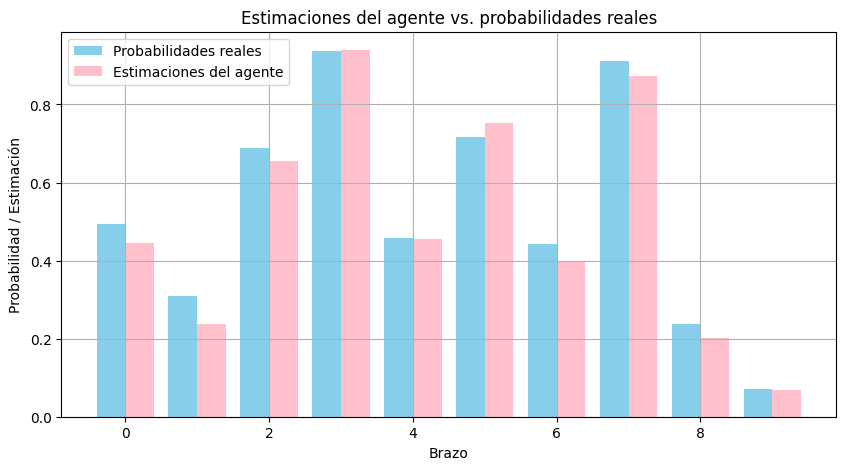

In [37]:
plt.figure(figsize=(10, 5))
plt.bar(np.arange(bandit.num_arms) - 0.2, bandit.probabilities, width=0.4, label="Probabilidades reales", color='skyblue')
plt.bar(np.arange(bandit.num_arms) + 0.2, agent.values, width=0.4, label="Estimaciones del agente", color='pink')
plt.title("Estimaciones del agente vs. probabilidades reales")
plt.xlabel("Brazo")
plt.ylabel("Probabilidad / Estimación")
plt.legend()
plt.grid(True)
plt.show()
